In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Visualization

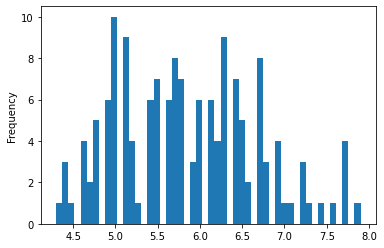

In [5]:
df['SepalLengthCm'].plot.hist(bins=50)

In [6]:
### from the above histogram we see that max data points at sepal width of 5.0cm. 

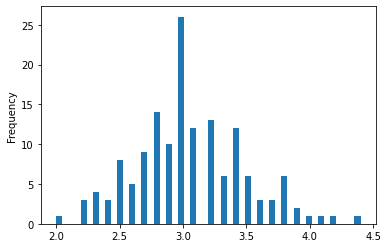

In [7]:
df['SepalWidthCm'].plot.hist(bins=50)

In [8]:
###from the above histogram we see that the maximum data points are present at sepal width of 3.0cm.

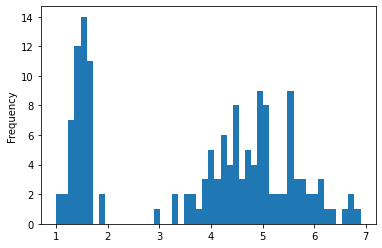

In [9]:
df['PetalLengthCm'].plot.hist(bins=50)

In [10]:
### from the figure above we can conclude that the maximum no of data points are present at petal length of 1.5cm

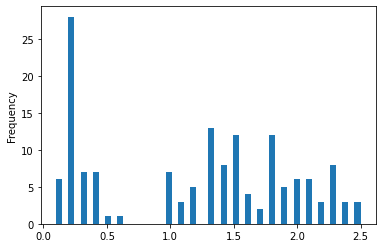

In [11]:
df['PetalWidthCm'].plot.hist(bins=50)

In [12]:
### from the figure above we can conclude that the max. no of data points are present at 0.25cm

In [13]:
del df['Id']

# Exploratory data analysis

In [14]:
a = df.groupby('Species')

In [15]:
a.agg(func=[np.mean,np.std,np.median,'min','max'])

SepalLengthCm                            SepalWidthCm  \
                         mean       std median  min  max         mean   
Species                                                                 
Iris-setosa             5.006  0.352490    5.0  4.3  5.8        3.418   
Iris-versicolor         5.936  0.516171    5.9  4.9  7.0        2.770   
Iris-virginica          6.588  0.635880    6.5  4.9  7.9        2.974   

                                           PetalLengthCm                   \
                      std median  min  max          mean       std median   
Species                                                                     
Iris-setosa      0.381024    3.4  2.3  4.4         1.464  0.173511   1.50   
Iris-versicolor  0.313798    2.8  2.0  3.4         4.260  0.469911   4.35   
Iris-virginica   0.322497    3.0  2.2  3.8         5.552  0.551895   5.55   

                          PetalWidthCm                             
                 min  max         mean       std median  min  max  
Species                                                            
Iris-setosa      1.0  1.9        0.244  0.107210    0.2  0.1  0.6  
Iris-versicolor  3.0  5.1        1.326  0.197753    1.3  1.0  1.8  
Iris-virginica   4.5  6.9        2.026  0.274650    2.0  1.4  2.5

# Decision tree algorithm implementation

In [16]:
X = df.drop("Species",axis=1)
y = df['Species']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=23)

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
preds = model.predict(X_test)
y_predict = model.predict(X_train)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [22]:
print("training accuracy is:%.2f"%(accuracy_score(y_predict,y_train)))
print("testing accuracy is:%.2f"%(accuracy_score(preds,y_test)))

training accuracy is:1.00
testing accuracy is:1.00


In [23]:
print(confusion_matrix(preds,y_test))

[[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]


In [24]:
pd.crosstab(preds,y_test)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,16,0,0
Iris-versicolor,0,11,0
Iris-virginica,0,0,11


In [25]:
print(classification_report(preds,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [26]:
### hence we can conclude that the accuracy of the trained decision tree is 100% for training and test both.

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=23)
clf = clf.fit(X,y)

[Text(418.5, 498.3, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 135.89999999999998, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923076923, 45.2

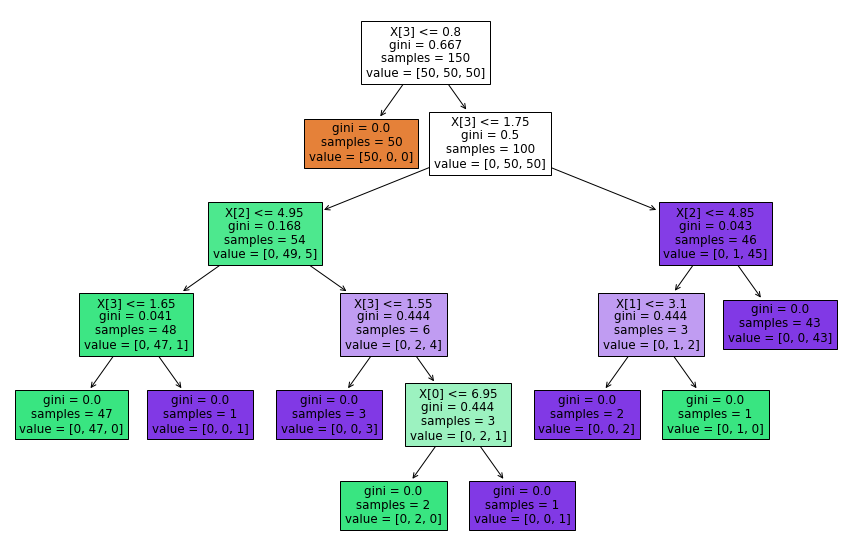

In [28]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [29]:
print(tree.export_text(clf))

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica

